In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

time_epoch = 60
epochs_per_batch = 50

# hard coded nrows
df_all = pd.read_csv('../../../diploma/multi-source-syber-security-events/flows.txt', header=None, nrows=200000)

df_all.columns = ['time', 'duration', 'source computer', 'source port', 'destination computer', 
              'destination port', 'protocol', 'packet count', 'byte count']

df = df_all[df_all['time'] <= epochs_per_batch * time_epoch]

df.index = df['time']
df.drop(columns=['time'],inplace=True)
df.head()

c:\users\sotiris\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,duration,source computer,source port,destination computer,destination port,protocol,packet count,byte count
time,,,,,,,,
1,0,C1065,389,C3799,N10451,6,10,5323
1,0,C1423,N1136,C1707,N1,6,5,847
1,0,C1423,N1142,C1707,N1,6,5,847
1,0,C14909,N8191,C5720,2049,6,1,52
1,0,C14909,N8192,C5720,2049,6,1,52


In [2]:
# get all the host in the buckets we are interested in 

hosts = np.array(list(set(df_all[df_all['time'] <= epochs_per_batch * time_epoch * 2]['source computer'].values))) 

In [ ]:
from helper import group_scale_data, group_scale_data_batch

groupped_data, hosts, parameters = group_scale_data(df, size_of_bin_seconds=time_epoch,
                                                    doScale=True, scaler='log', hosts=hosts)

In [ ]:
groupped_data.head()

In [ ]:
df1 = df_all[(df_all['time'] > epochs_per_batch * time_epoch) & (df_all['time'] <= epochs_per_batch * time_epoch * 2)]

df1.index = df1['time']
df1.drop(columns=['time'], inplace=True)
df1.head()

In [ ]:
# TODO what to do with new hosts or hosts that dont have values in the second batch ?

groupped_data1, hosts1 = group_scale_data_batch(df1, parameters)

In [ ]:
# HARD CODED TODO ADD TO FUNCTION

groupped_data1['epoch'] += epochs_per_batch

In [ ]:
groupped_data1.head()

In [4]:
from sklearn.externals import joblib

#joblib.dump(groupped_data,'groupped_data_60_500.pkl')
#joblib.dump(groupped_data1,'groupped_data1_60_500.pkl')
groupped_data = joblib.load('groupped_data_60_100.pkl')
groupped_data1 = joblib.load('groupped_data1_60_100.pkl')

In [5]:
assert len(groupped_data) == len(groupped_data1)

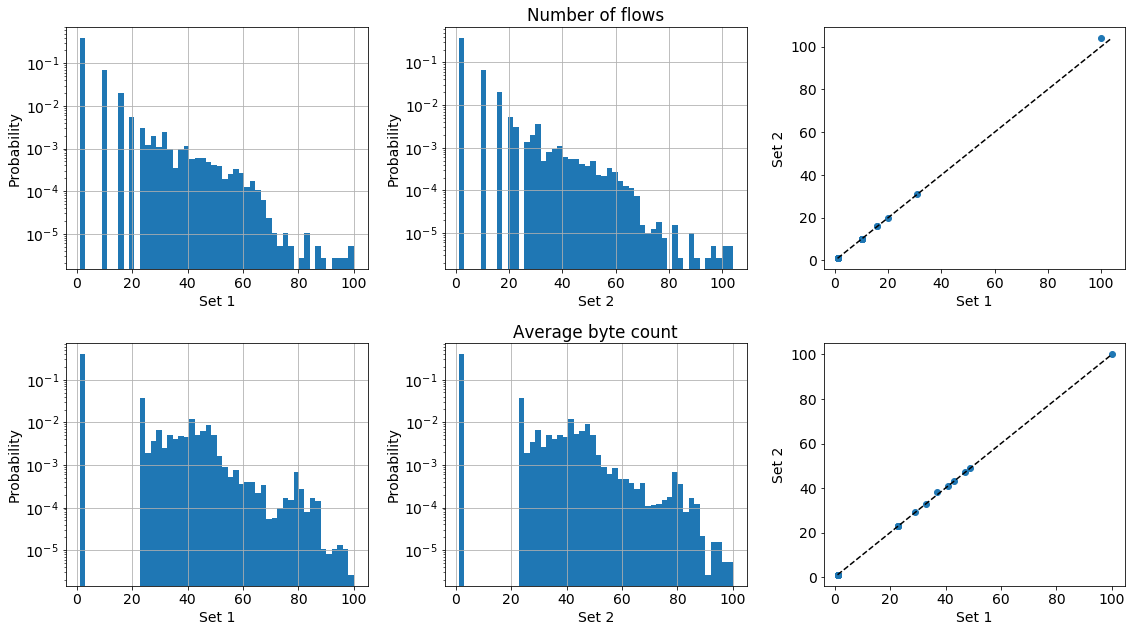

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams['font.size'] = 14

def plot_qq_plot(data1, data2, i, N, label):
    plt.subplot(N, 3, i * 3 - 2)
    # the histogram of the data
    plt.hist(data1, 50, normed=1, log=True)
    plt.grid(True)
    plt.ylabel('Probability')
    plt.xlabel('Set 1')
    
    plt.subplot(N, 3, i * 3 - 1)
    # the histogram of the data
    plt.title(label)
    plt.hist(data2, 50, normed=1, log=True)
    plt.grid(True)
    plt.ylabel('Probability')
    plt.xlabel('Set 2')
    
    plt.subplot(N, 3, i * 3)
    plt.ylabel('Set 2')
    plt.xlabel('Set 1')
    
    percs = np.linspace(0,100,51)
    qn_a = np.percentile(data1, percs)
    qn_b = np.percentile(data2, percs)

    plt.plot(qn_a,qn_b, ls="", marker="o")

    x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
    plt.plot(x,x, color="k", ls="--")

plot_qq_plot(groupped_data['number of flows'].values, groupped_data1['number of flows'].values, 1, 2, 'Number of flows')
plot_qq_plot(groupped_data['mean(byte count)'].values, groupped_data1['mean(byte count)'].values, 2, 2, 'Average byte count')

plt.tight_layout()

plt.show()

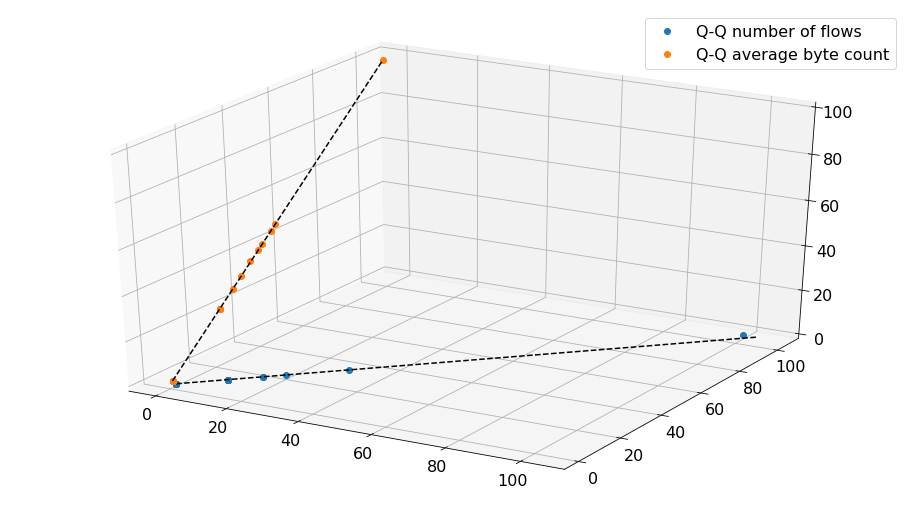

In [97]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 16, 9

percs = np.linspace(0,100,51)

fig = plt.figure()
ax = fig.gca(projection='3d')


qn_flows_a = np.percentile(groupped_data['number of flows'].values, percs)
qn_flows_b = np.percentile(groupped_data1['number of flows'].values, percs)

z = np.zeros(len(percs))
ax.plot(qn_flows_a, qn_flows_b, z, label='Q-Q number of flows', ls="", marker="o")

x = np.linspace(np.min((qn_flows_a.min(),qn_flows_b.min())), np.max((qn_flows_a.max(),qn_flows_b.max())))
ax.plot(x, x, np.zeros(len(x)), color="k", ls="--")


qn_mean_bytes_a = np.percentile(groupped_data['mean(byte count)'].values, percs)
qn_mean_bytes_b = np.percentile(groupped_data1['mean(byte count)'].values, percs)

z = np.zeros(len(percs))

ax.plot(z, qn_mean_bytes_a, qn_mean_bytes_b, label='Q-Q average byte count', ls="", marker="o")

x = np.linspace(np.min((qn_mean_bytes_a.min(),qn_mean_bytes_b.min())), np.max((qn_mean_bytes_a.max(),qn_mean_bytes_b.max())))
plt.plot(np.zeros(len(x)), x, x, color="k", ls="--")





ax.legend()

plt.show()


In [12]:
np.percentile(groupped_data['number of flows'].values, percs)

array([   1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   16.,   16.,   20.,   31.,  100.])

In [16]:
np.percentile(groupped_data1['number of flows'].values, percs)

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  16.,  16.,  20.,  31.,  97.])

### T TEST STATISTCIS

In [14]:
from scipy import stats

print(stats.ttest_ind(groupped_data.values[:,0],groupped_data1.values[:,0]))

print(stats.ttest_ind(groupped_data.values[:,1],groupped_data1.values[:,1]))


Ttest_indResult(statistic=0.18365869350404826, pvalue=0.85428141202704899)
Ttest_indResult(statistic=0.067537675302132602, pvalue=0.94615374121833873)


### Kolmogorov–Smirnov test 2d

In [17]:
from ndtest import ks2d2s

ks2d2s(groupped_data.values[:,0], groupped_data.values[:,1], groupped_data1.values[:,0], groupped_data1.values[:,1], extra=True)

(0.99225480254811238, 0.0022756071805702209)

### Q-Q plot with the fitted mixture of Poisson

In [7]:
from emClustering import OnlineEM
from plots import plot_points, plot_results, plot_category, plot_all_categories
from kplusplus import KPlusPlus
import numpy as np
import pandas as pd

In [8]:
mixtures = 13

kplusplus = KPlusPlus(mixtures, groupped_data.values[:, :2], stochastic=True, stochastic_n_samples=10000)

kplusplus.init_centers(verbose=1)

Centers found: 1
Centers found: 2
Centers found: 3
Centers found: 4
Centers found: 5
Centers found: 6
Centers found: 7
Centers found: 8
Centers found: 9
Centers found: 10
Centers found: 11
Centers found: 12
Centers found: 13


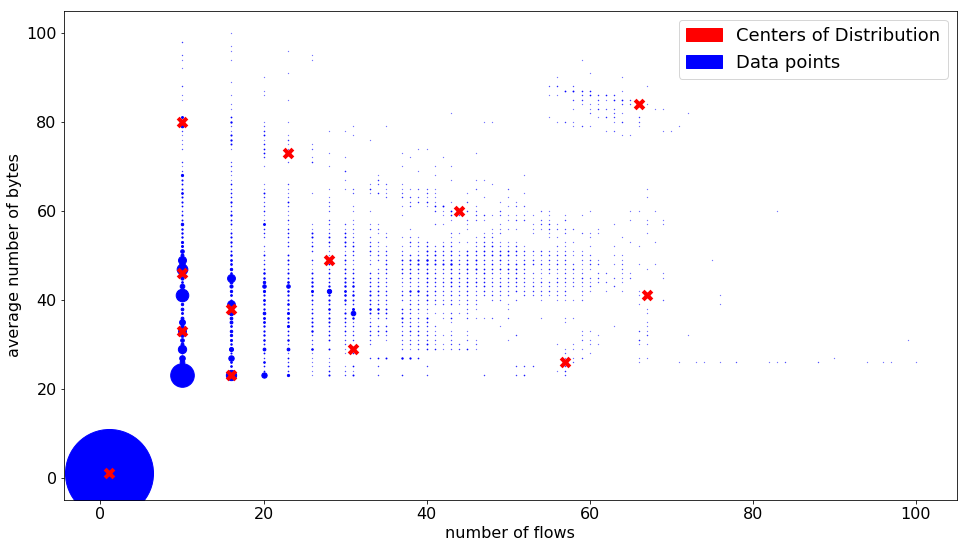

In [9]:
test = int(len(set(groupped_data['source computer'].values)))

# random initialization
onlineEM = OnlineEM([1/mixtures]*mixtures, kplusplus.centers, test, n_clusters=8, verbose=1, update_power=0.5)

plot_points(groupped_data.values[:, :2], onlineEM)

In [10]:
data = groupped_data.values[:,[0,1,3]]

onlineEM.fit(data)

Running for data till position 1912 from total 191200
Running for data till position 3824 from total 191200
Running for data till position 5736 from total 191200
Running for data till position 7648 from total 191200
Running for data till position 9560 from total 191200
Running for data till position 11472 from total 191200
Running for data till position 13384 from total 191200
Running for data till position 15296 from total 191200
Running for data till position 17208 from total 191200
Running for data till position 19120 from total 191200
Running for data till position 21032 from total 191200
Running for data till position 22944 from total 191200
Running for data till position 24856 from total 191200
Running for data till position 26768 from total 191200
Running for data till position 28680 from total 191200
Running for data till position 30592 from total 191200
Running for data till position 32504 from total 191200
Running for data till position 34416 from total 191200
Running for dat

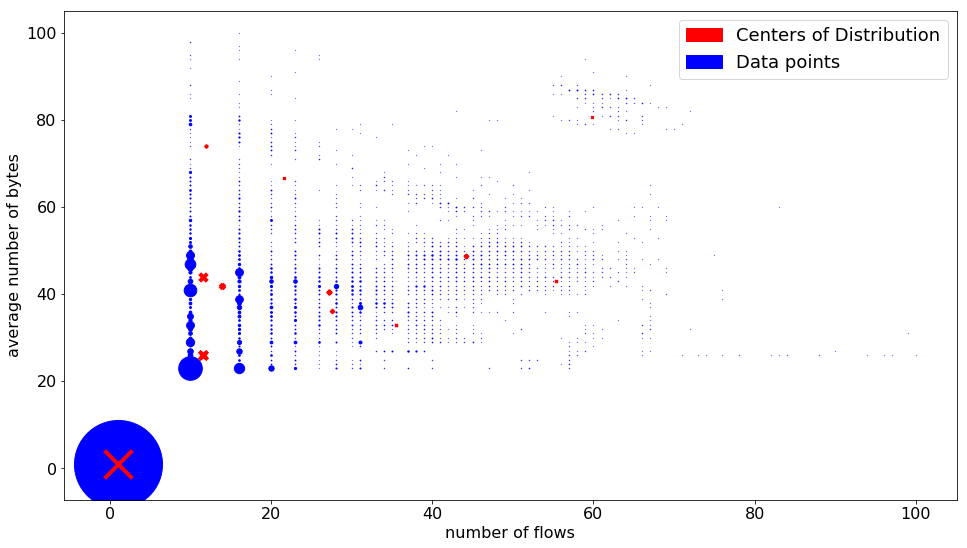

In [11]:
plot_points(groupped_data.values[:, :2], onlineEM)

In [12]:
# joblib.dump(onlineEM,'onlineEM_60_100_13.pkl')
onlineEM = joblib.load('onlineEM_60_100_13.pkl')

['onlineEM_60_100_13.pkl']

In [89]:
from numpy.random import poisson as rand_poisson

def generate_data(em, n_points=100000):
    cum_sum = em.gammas.cumsum()
    points = None
    for gamma, lambdas in zip(em.gammas, em.lambdas):
        n_distrib = int(gamma * n_points)
        points_distrib = np.zeros(shape=(n_distrib, em.dim))
        for i, lambda_i in enumerate(lambdas):
            points_distrib[:, i] = rand_poisson(lam=lambda_i, size=n_distrib)
    
        if len(points_distrib) > 0:
            if points is None:
                points = points_distrib.copy()
            else:
                points = np.append(points, points_distrib, axis=0)
    return points

In [90]:
points = generate_data(onlineEM)

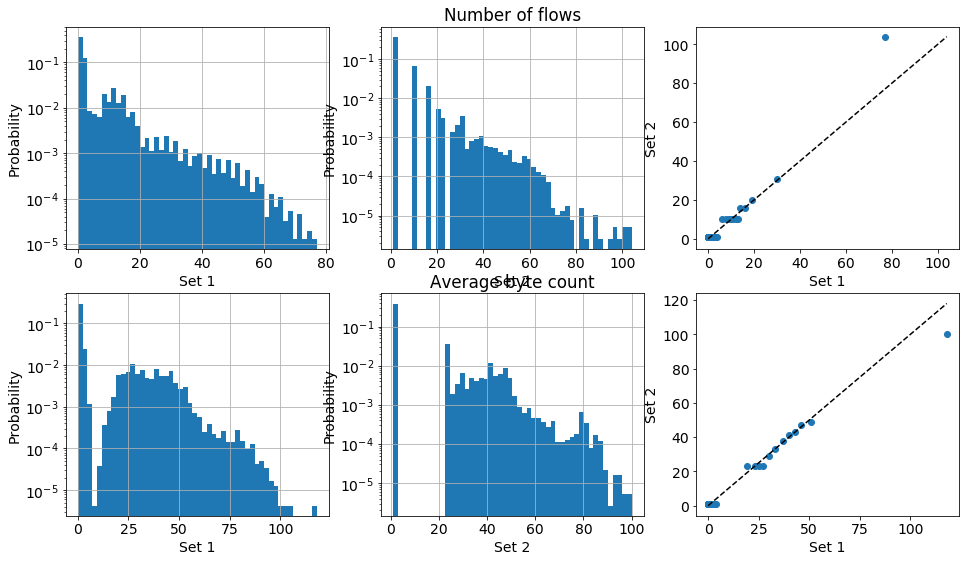

In [100]:
plot_qq_plot(points[:, 0], groupped_data1['number of flows'].values, 1, 2, 'Number of flows')
plot_qq_plot(points[:, 1], groupped_data1['mean(byte count)'].values, 2, 2, 'Average byte count')

In [101]:
from ndtest import ks2d2s

ks2d2s(points[:,0], points[:,1], groupped_data1.values[:,0], groupped_data1.values[:,1], extra=True)

(0.0, 0.4090111446922623)